In [1]:
from bosonicplus.base import State
from bosonicplus.fidelity import fidelity_coherent, fidelity_with_wigner
from bosonicplus.states.gkp_squeezing import gen_gkp_coherent

import numpy as np
from thewalrus.symplectic import squeezing, beam_splitter, expand, xxpp_to_xpxp, expand_vector
from copy import copy
from bosonicplus.plotting import plot_wigner_marginals
from matplotlib import pyplot as plt

S1 = xxpp_to_xpxp(expand(squeezing(1,np.pi), [0], 2))
B = xxpp_to_xpxp(beam_splitter(np.pi/4, 0))
S2 = xxpp_to_xpxp(expand(squeezing(1,0), [1], 2))


s1 = State(2)
print(s1.ordering)
s1.apply_symplectic(B@S1@S2)
s1.apply_loss(np.array([0.5,1.0]),np.array([0,0]))
print(s1.covs)

#s1.to_xpxp()
print(s1.ordering)
print(s1.covs)

xpxp
[[[ 2.38109785e+00 -1.57035087e-16  1.81343020e+00 -1.57035087e-16]
  [-1.57035087e-16  3.76219569e+00 -1.57035087e-16 -3.62686041e+00]
  [ 1.81343020e+00 -1.57035087e-16  2.38109785e+00 -1.57035087e-16]
  [-1.57035087e-16 -3.62686041e+00 -1.57035087e-16  3.76219569e+00]]]
xpxp
[[[ 2.38109785e+00 -1.57035087e-16  1.81343020e+00 -1.57035087e-16]
  [-1.57035087e-16  3.76219569e+00 -1.57035087e-16 -3.62686041e+00]
  [ 1.81343020e+00 -1.57035087e-16  2.38109785e+00 -1.57035087e-16]
  [-1.57035087e-16 -3.62686041e+00 -1.57035087e-16  3.76219569e+00]]]


In [2]:
from bosonicplus.operations.gbs import build_interferometer
from bosonicplus.operations.parameters import gen_interferometer_params

#from bosonicplus.interferometers.construct import build_interferometer as old
#from bosonicplus.interferometers.parameters import gen_interferometer_params
from time import time

In [3]:
nmodes = 3
ns = np.repeat(5,nmodes)

params = gen_interferometer_params(nmodes, -13)
t0 = time()
state = build_interferometer(params, nmodes)

print(state.ordering)
t1 = time()
print('bosonicplus', t1-t0)


xpxp
bosonicplus 0.0008192062377929688


In [4]:
params

{'sqz': [(0.1875382706491189, -2.2910098240810486, 0),
  (1.4152142393824594, 2.2564975961560005, 1),
  (0.11440535002646196, -0.6106593362045354, 2)],
 'bs': [(0.1849272078793808, 1.964937785522542, [0, 1]),
  (0.7682159978231328, 1.70863737136027, [1, 2]),
  (0.987881791665755, 0.11468129797542082, [0, 1])],
 'phis': None,
 'loss': None,
 'alpha': None}

In [5]:
state_pnrd = copy(state)
t = 0
for i in range(state.num_modes-1):
    t0 = time()
    state_pnrd.post_select_fock_coherent(state_pnrd.num_modes - 1, ns[i], out =True)
    t1 = time()
    t+= t1-t0
    print('Total probability:', state_pnrd.probability)
    print(f'Time for measurement: {t1-t0} s ')
    print(f'Number of modes {state_pnrd.num_modes}')
print(f'Total time {t}')

Measuring 5 photons in mode 2.
Data shape before measurement, [(1, 6), (1, 6, 6), (1,)].
Probability of measurement = 3.262e-02-1.110e-16j
Data shape after measurement, [(36, 4), (1, 4, 4), (36,)]
Total probability: (0.032615730122514786-1.1102230246251565e-16j)
Time for measurement: 0.004209041595458984 s 
Number of modes 2
Measuring 5 photons in mode 1.
Data shape before measurement, [(36, 4), (1, 4, 4), (36,)].
Probability of measurement = 4.259e-02-3.331e-16j
Data shape after measurement, [(1296, 2), (1, 2, 2), (1296,)]
Total probability: (0.0013890195464229638-1.5591372934341875e-17j)
Time for measurement: 0.00162506103515625 s 
Number of modes 1
Total time 0.005834102630615234


/Users/s163967/venv/240827-bp/lib/python3.11/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/s163967/venv/240827-bp/lib/python3.11/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/s163967/Library/CloudStorage/OneDrive-DanmarksTekniskeUniversitet/Git_Repos/bosonicplus/src/bosonicplus/plotting.py:162: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


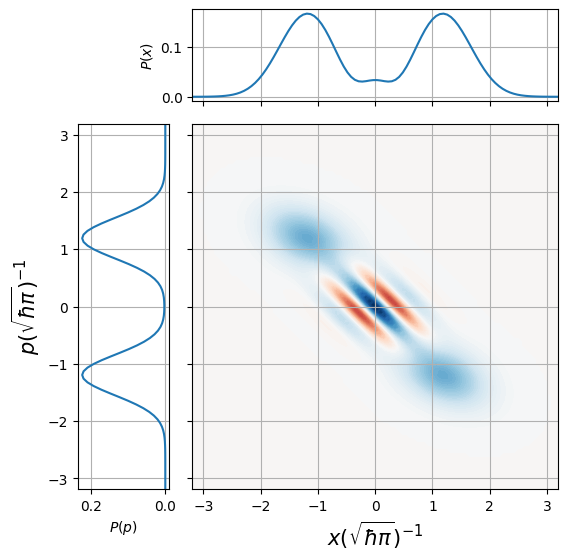

In [6]:
x = np.linspace(-8,8,100)
W_pnrd= state_pnrd.get_wigner(x,x)

plot_wigner_marginals(W_pnrd, x,x, '')
plt.show()

In [7]:
state_th = copy(state)
for i in range(state.num_modes-1):
    t0 = time()
    state_th.post_select_ppnrd_thermal(state_th.num_modes -1, ns[i],10, out =True)
    t1 = time()
    print('Total probability:', state_th.probability)
    print(f'Time for measurement: {t1-t0} s ')

Measuring 5 clicks in mode 2.
Data shape before measurement, [(1, 6), (1, 6, 6), (1,)].
Probability of measurement = 3.628e-02
Data shape after measurement, [(6, 4), (6, 4, 4), (6,)]
Total probability: 0.03627813023501858
Time for measurement: 0.0005550384521484375 s 
Measuring 5 clicks in mode 1.
Data shape before measurement, [(6, 4), (6, 4, 4), (6,)].
Probability of measurement = 4.919e-02
Data shape after measurement, [(36, 2), (36, 2, 2), (36,)]
Total probability: 0.0017846831758524372
Time for measurement: 0.0013890266418457031 s 


In [8]:
np.sum(state_pnrd.weights)

(1.0000000000001226+2.4868995751603507e-14j)

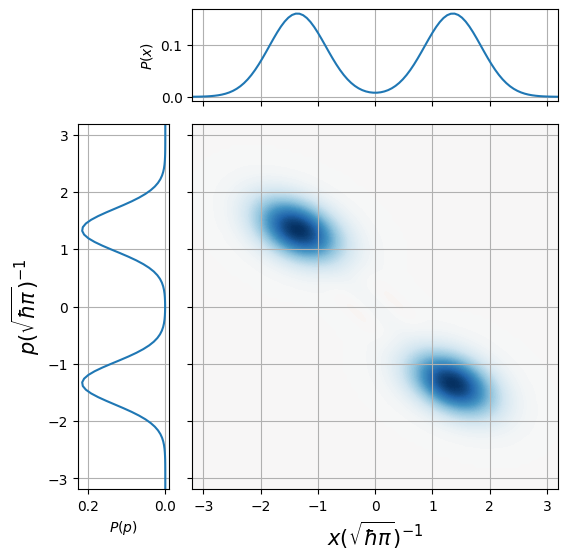

In [9]:
x = np.linspace(-8,8,100)
W_th = state_th.get_wigner(x,x)
plot_wigner_marginals( W_th.real, x,x, '')
plt.show()

(1, 2, 2)
8.326672684688674e-17


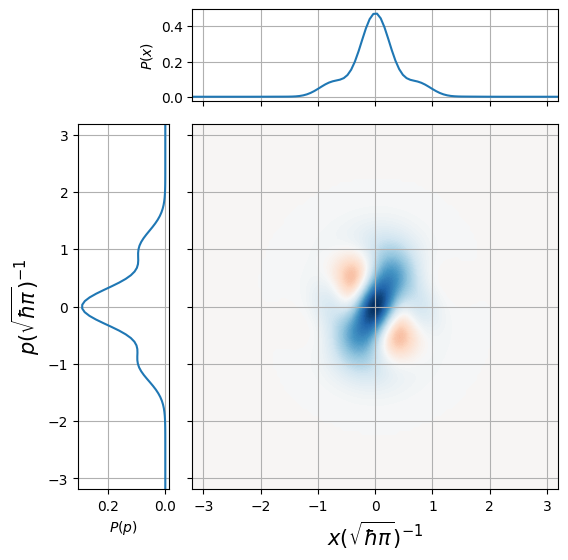

In [10]:
data_gkp = gen_gkp_coherent(4, 'h0')
x = np.linspace(-8,8,100)
gkp = State(1)
gkp.update_data(data_gkp)
print(gkp.covs.shape)
Wgkp = gkp.get_wigner(x,x)
print(np.max(Wgkp.imag))
plot_wigner_marginals( Wgkp.real, x,x, '')
plt.show()


In [11]:
fidelity_coherent(gkp, state_pnrd)

(0.013883755392539499+5.684341886080802e-14j)

In [12]:
fidelity_with_wigner(W_pnrd,Wgkp,x,x)

(0.013883755391838929+8.769029635664477e-17j)

## Strawberryfields check

In [13]:
import strawberryfields as sf
from strawberryfields.ops import Sgate, BSgate, MeasureFock

sqz = params['sqz']
bs = params['bs']

eng = sf.Engine('fock', backend_options={"cutoff_dim": 25})
prog = sf.Program(nmodes)

ns_fock = ns.tolist()

t0 = time()

with prog.context as q:
    for i in range(nmodes):
        Sgate(sqz[i][0], sqz[i][1]) | q[i]
        print(sqz[i][0], sqz[i][1])
    for i in range(len(bs)):
        BSgate(bs[i][0], bs[i][1]) | (q[bs[i][2][0]], q[bs[i][2][1]])
        print(bs[i][0],bs[i][1], bs[i][2])
        
    for i in range(nmodes-1):
        MeasureFock(select = ns_fock[i]) | q[(nmodes-1)-i] #Measure the last mode

result = eng.run(prog)

tf = time()

print(f'Total simulation time {tf-t0}')

0.1875382706491189 -2.2910098240810486
1.4152142393824594 2.2564975961560005
0.11440535002646196 -0.6106593362045354
0.1849272078793808 1.964937785522542 [0, 1]
0.7682159978231328 1.70863737136027 [1, 2]
0.987881791665755 0.11468129797542082 [0, 1]
Total simulation time 6.296739101409912


In [14]:
params

{'sqz': [(0.1875382706491189, -2.2910098240810486, 0),
  (1.4152142393824594, 2.2564975961560005, 1),
  (0.11440535002646196, -0.6106593362045354, 2)],
 'bs': [(0.1849272078793808, 1.964937785522542, [0, 1]),
  (0.7682159978231328, 1.70863737136027, [1, 2]),
  (0.987881791665755, 0.11468129797542082, [0, 1])],
 'phis': None,
 'loss': None,
 'alpha': None}

/Users/s163967/Library/CloudStorage/OneDrive-DanmarksTekniskeUniversitet/Git_Repos/bosonicplus/src/bosonicplus/plotting.py:162: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


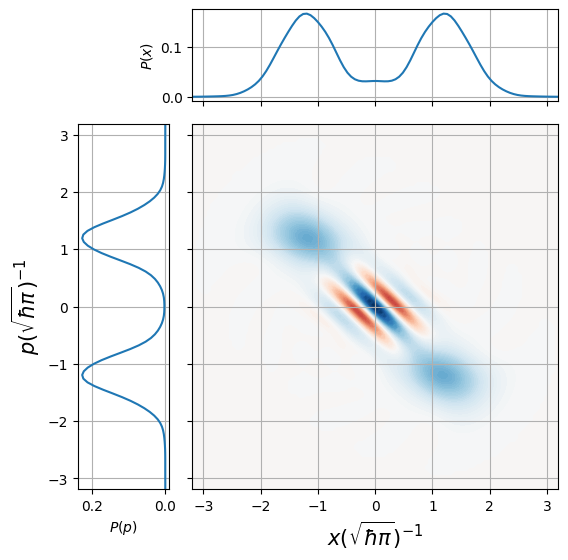

In [15]:
fock_res = result.state

x = np.linspace(-8,8,100)
W_sf = fock_res.wigner(0, x,x)

plot_wigner_marginals( W_sf,x,x,'')


plt.show()

In [16]:
state_homo = copy(state)
state_homo.post_select_homodyne(0, np.pi/2, 0)

In [17]:
from bosonicplus.states.nongauss import prepare_sqz_cat_coherent

In [20]:
state = prepare_sqz_cat_coherent(2, 5, 0)
state.data

(array([[ 1.35335283 +0.j        ,  0.         +0.j        ],
        [-1.35335283 +0.j        ,  0.         +0.j        ],
        [ 0.         +0.j        ,  0.        -73.89056099j],
        [ 0.         +0.j        ,  0.        +73.89056099j]]),
 array([[1.83156389e-02, 0.00000000e+00],
        [0.00000000e+00, 5.45981500e+01]]),
 array([mpc(real='0.5', imag='0.0'), mpc(real='0.5', imag='0.0'),
        mpc(real='9.6437492398196573e-23', imag='0.0'),
        mpc(real='9.6437492398196573e-23', imag='0.0')], dtype=object))